In [1]:
from ldm.data.personalized import MVGSPersonalizedBase
from torch.utils.data import random_split, DataLoader, Dataset, Subset
import torch
# import torch.multiprocessing as mp

/home/comp/csqsong/.conda/envs/text/lib/python3.9/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
# mp.set_start_method('spawn', force=True)
dataset =  MVGSPersonalizedBase(data_root='../input/cat-multi-view/cat.ply')

Number of points at loading :  39411


In [3]:
dataloader = DataLoader(dataset, batch_size = 4, num_workers = 0)


In [13]:
for data in dataloader:
    print(data.keys())

dict_keys(['caption', 'images', 'poses'])
dict_keys(['caption', 'images', 'poses'])
dict_keys(['caption', 'images', 'poses'])
dict_keys(['caption', 'images', 'poses'])
dict_keys(['caption', 'images', 'poses'])
dict_keys(['caption', 'images', 'poses'])
dict_keys(['caption', 'images', 'poses'])
dict_keys(['caption', 'images', 'poses'])
dict_keys(['caption', 'images', 'poses'])
dict_keys(['caption', 'images', 'poses'])
dict_keys(['caption', 'images', 'poses'])
dict_keys(['caption', 'images', 'poses'])
dict_keys(['caption', 'images', 'poses'])
dict_keys(['caption', 'images', 'poses'])
dict_keys(['caption', 'images', 'poses'])
dict_keys(['caption', 'images', 'poses'])
dict_keys(['caption', 'images', 'poses'])
dict_keys(['caption', 'images', 'poses'])
dict_keys(['caption', 'images', 'poses'])
dict_keys(['caption', 'images', 'poses'])
dict_keys(['caption', 'images', 'poses'])
dict_keys(['caption', 'images', 'poses'])
dict_keys(['caption', 'images', 'poses'])
dict_keys(['caption', 'images', 'p

In [5]:
temp = data['images'][:1].squeeze(0)

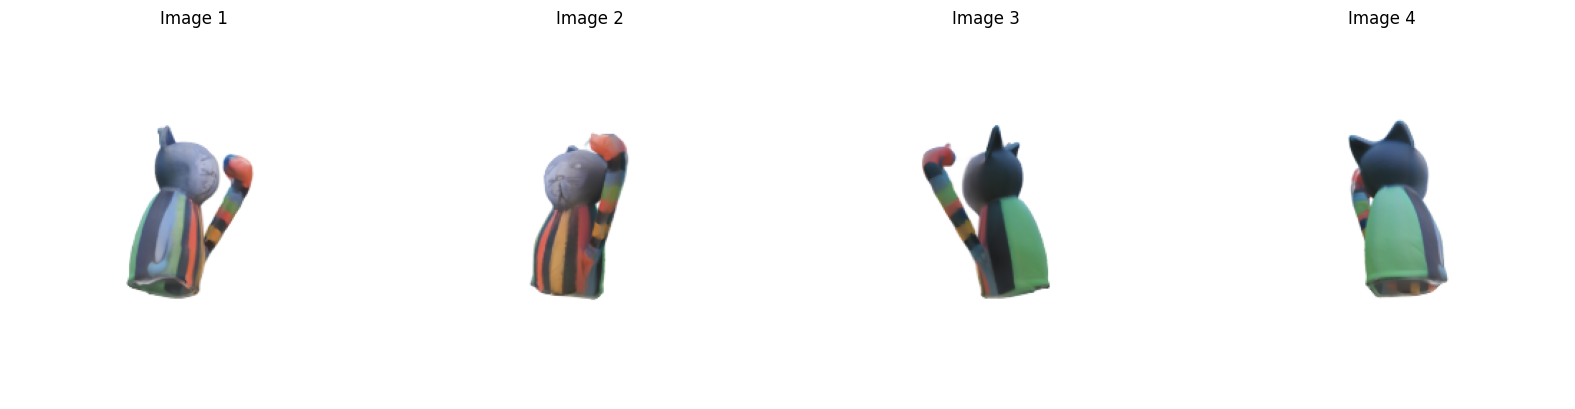

In [6]:
import matplotlib.pyplot as plt

temp_np = temp.permute(0, 2, 3, 1).detach().cpu().numpy()  # 转换为 NumPy 数组

fig, axes = plt.subplots(1, 4, figsize=(16, 4))


for i in range(temp_np.shape[0]):
    axes[i].imshow(temp_np[i])
    axes[i].axis('off')  
    axes[i].set_title(f'Image {i+1}')

plt.tight_layout()
plt.show()

In [7]:
poses = data['poses'][:1].squeeze(0)

In [8]:
poses.shape

torch.Size([4, 4, 4])

In [9]:
poses = poses[:, [0, 2, 1, 3]]

In [10]:
poses[:, 1] *= -1

In [11]:
from mvdream.camera_utils import get_camera, convert_opengl_to_blender, normalize_camera

In [12]:
camera = normalize_camera(poses).view(4, 16)